In [2]:
import pandas as pd
import numpy as np
import regex

In [3]:
data = pd.read_csv("C:/Users/user/Desktop/동작구청/국민권익위원회 경진 대회 데이터(목적이외 사용시 관련 법에 의해 처벌 받을수 있음).csv")

In [4]:
data.head()

,제목,질문내용,답변내용,등록일시,최상위기관명,분야코드,분야명,담당부서명
0,의성군 귀농귀촌 정책 문의,의성군 귀농귀촌 정책 문의,1. 우선 저희 의성군으로 귀농·귀촌하고자 하셔서 감사합니다.\n \n2. 귀농·귀...,2021-08-27 오후 3:31:44,경상북도 의성군,20010010,행정/자치/안전,농업기술센터
1,불법주정차 신고합니다,5대 불법주정차 과태료 부과 대상,1. 귀하의 가정에 평안함과 행복을 기원합니다. 귀하께서 국민신문고로 요청하신 사항...,2021-08-27 오후 1:49:33,경상북도 의성군,20010010,행정/자치/안전,일자리창출과
2,아동수당 지급 대상,아동수당 지급 대상이 궁금합니다.,1. 안녕하십니까? 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다....,2021-08-27 오후 4:19:51,경상북도 의성군,20010010,행정/자치/안전,복지과
3,광견병 예방 접종 관련 문의,광견병 예방접종 질문사항.\n1. 의성군에서 광견병 접종 예방 계획이 있으신지요?...,안녕하십니까?\n1. 귀하께서 국민신문고를 통해 신청하신 민원에 대한 검토 결과를 ...,2021-08-27 오후 4:18:09,경상북도 의성군,20010010,행정/자치/안전,농축산과
4,아동수당 지급 금액과 지급 일자,아동수당 지급 금액과 지급 일자가 궁금합니다.,1. 안녕하십니까? 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다....,2021-08-27 오후 4:24:24,경상북도 의성군,20010010,행정/자치/안전,복지과


In [7]:
data['제목'] = data['제목'].astype(str)
data['질문내용'] = data['질문내용'].astype(str)
data['답변내용'] = data['답변내용'].astype(str)

In [8]:
data['combine'] = data.apply(lambda x:x['제목']+" "+"\n"+x['질문내용']+"\n",axis=1)
data['combine']

0                        의성군 귀농귀촌 정책 문의 \n의성군 귀농귀촌 정책 문의\n
1                       불법주정차 신고합니다 \n5대 불법주정차 과태료 부과 대상\n
2                        아동수당 지급 대상 \n아동수당 지급 대상이 궁금합니다.\n
3        광견병 예방 접종 관련 문의 \n광견병 예방접종 질문사항.\n1. 의성군에서  광견...
4          아동수당 지급 금액과 지급 일자 \n아동수당 지급 금액과 지급 일자가 궁금합니다.\n
                               ...                        
57244    연안복합 낚시어선의 등화 광력 기준은 어떻게 되나요? \n연안복합 낚시어선의 등화 ...
57245      해기사 시험은 어떻게 시행되고 있는가 \n해기사 시험은 어떻게 시행되고 있습니까?\n
57246          유선의 선원법 관련 법령 적용 여부 \n유선의 선원법 관련 법령 적용 여부\n
57247            전문사모집합투자업 등록 요건 문의 \n전문사모집합투자업 등록 요건 문의\n
57248                   의심거래보고의 개념 \n의심거래보고(STR)란 무엇인가요?\n
Name: combine, Length: 57249, dtype: object

In [9]:
from konlpy.tag import Okt
from collections import Counter
okt = Okt()

In [47]:
okt.morphs("안녕하세요 저는")

['안녕하세요', '저', '는']

In [15]:
len(data['tokens'].values)

57249

In [13]:
data['tokens'] = data['combine'].apply(lambda x:okt.nouns(x))

In [14]:
data['tokens']s

0               [의성군, 귀농, 귀촌, 정책, 문의, 의성군, 귀농, 귀촌, 정책, 문의]
1                        [불법, 정차, 신고, 불법, 정차, 과태료, 부과, 대상]
2                         [아동, 수당, 지급, 대상, 아동, 수당, 지급, 대상]
3        [광견병, 예방, 접종, 관련, 문의, 광견병, 예방접종, 질문, 사항, 의성군, ...
4         [아동, 수당, 지급, 금액, 지급, 일자, 아동, 수당, 지급, 금액, 지급, 일자]
                               ...                        
57244    [연안, 복합, 낚시, 선의, 등화, 광력, 기준, 연안, 복합, 낚시, 선의, 등...
57245                       [해, 기사, 시험, 시행, 해, 기사, 시험, 시행]
57246    [유선, 선원, 법, 관련, 법령, 적용, 여부, 유선, 선원, 법, 관련, 법령,...
57247       [집합, 투자, 업, 등록, 요건, 문의, 집합, 투자, 업, 등록, 요건, 문의]
57248                  [의심, 거래, 보고, 개념, 의심, 거래, 보고, 란, 무엇]
Name: tokens, Length: 57249, dtype: object

In [16]:
temp = data['tokens'].values

In [ ]:
with open('stopwords.txt',encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

In [57]:
lis = []
for i in range(0,len(temp)-1):
    for j in range(0,len(temp[i])-1):
        if len(temp[i][j]) > 1:
            if temp[i][j] not in stopwords:
                lis.append(temp[i][j])

In [58]:
count = Counter(lis)

In [59]:
count.most_common(100)

[('신청', 9649),
 ('관련', 8687),
 ('신고', 8433),
 ('문의', 8109),
 ('사업', 7066),
 ('시설', 6500),
 ('방법', 5547),
 ('사용', 5331),
 ('학교', 5072),
 ('등록', 4937),
 ('관리', 4889),
 ('변경', 4732),
 ('대한', 4516),
 ('허가', 4401),
 ('기준', 4143),
 ('설치', 3962),
 ('발급', 3955),
 ('처리', 3870),
 ('지원', 3759),
 ('민원', 3614),
 ('절차', 3610),
 ('대상', 3567),
 ('교육', 3475),
 ('확인', 3391),
 ('대해', 3313),
 ('기간', 3274),
 ('서류', 3269),
 ('이용', 3201),
 ('운영', 3037),
 ('내용', 2987),
 ('정보', 2650),
 ('도로', 2586),
 ('사항', 2497),
 ('해당', 2447),
 ('공사', 2435),
 ('요청', 2379),
 ('가능', 2343),
 ('차량', 2342),
 ('지역', 2258),
 ('사업자', 2249),
 ('지급', 2202),
 ('학생', 2201),
 ('안전', 2103),
 ('발생', 2083),
 ('계획', 2049),
 ('대하', 2024),
 ('질의', 1982),
 ('구역', 1906),
 ('위원회', 1902),
 ('주택', 1876),
 ('개인', 1847),
 ('기관', 1843),
 ('제출', 1808),
 ('불법', 1783),
 ('시행', 1778),
 ('선박', 1769),
 ('공무원', 1721),
 ('계약', 1710),
 ('자격', 1686),
 ('적용', 1647),
 ('위반', 1622),
 ('증명서', 1611),
 ('업체', 1579),
 ('업무', 1558),
 ('판매', 1556),
 ('검사', 1555),
 ('유치원

In [66]:
from wordcloud import WordCloud

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',background_color="white", max_font_size=60)
wordcloud = wc.generate_from_frequencies(dict(count))

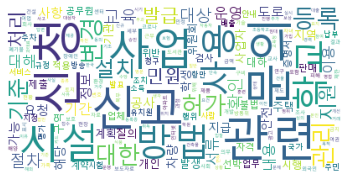

In [67]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

plt.imshow(wordcloud)
plt.axis('off')
plt.show()